In [18]:
real_filenames = {"opt20" : './results/04-opt-evaluation-new2020-min-runtimes.json',
                 'opt14' : './results/03-opt-evaluation-new2014-min-runtimes.json', 
                 'sat14' : './results/06-sat-evaluation-new2014-min-runtimes.json', 
                 'sat20' : './results/07-sat-evaluation-new2020-min-runtimes.json',
                 'satipc' : './results/05-sat-evaluation-ipc-min-runtimes.json', 
                 'optipc' : './results/02-opt-evaluation-ipc-min-runtimes.json'}

predicted_filenames = {"opt20" : './results/2020-09-03-opt20-predicted-min-runtimes.json',
                      'opt14' : './results/2020-09-03-opt14-predicted-min-runtimes.json',
                      'sat14' : './results/2020-09-03-sat14-predicted-min-runtimes.json', 
                      'sat20' : './results/2020-09-03-sat20-predicted-min-runtimes.json'}

# Exclude some domains where predicted runtimes are based on the baseline.
domains_excluded = {"opt20" : ['gripper'],
                      'opt14' : ['gripper'],
                      'sat14' : ['gripper', 'miconic-strips'], 
                      'sat20' : ['gripper', 'miconic-strips', 'elevators']}


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import math
import json
from collections import defaultdict

def prediction_plot(track):
    with open(real_filenames[track]) as f1:
          real_data = json.load(f1) 

    with open(predicted_filenames[track]) as f2:
          predicted_data = json.load(f2)

    real = []
    predicted = []
    categories = []
    categories_matter = defaultdict(int)
    
    for instance in sorted(real_data): 
        domain = instance.split(":")[0]
        if domain in domains_excluded[track]: 
            continue
        
        rtime = real_data[instance] if real_data[instance] else 2000
        ptime = predicted_data[instance.replace('.pddl', '')] if predicted_data[instance.replace('.pddl', '')] else 2000
        
        if abs(rtime-ptime) > 200 and max(rtime/ptime, ptime/rtime) > 10:
            categories_matter[domain] += 1
            
        real.append(rtime)
        predicted.append(ptime)
        categories.append(domain)
        
    categories = [c if categories_matter[c] > 2 else 'others' for c in categories ]
        
    df = pd.DataFrame(dict(x=real, y=predicted, label=categories))
    groups = df.groupby('label')

    f, ax = plt.subplots(figsize=(6, 6))

    ax.plot([0, 1], [0, 1], transform=ax.transAxes)

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='',  label=name)

    ax.legend(numpoints=1, loc='upper left', bbox_to_anchor=(1.05, 1), title=track)

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Real")
    plt.ylabel("Predicted")
    plt.grid()
    
    plt.plot([0.5, 2000], [180, 180], color='red')
    plt.plot([180, 180], [0.5, 2000], color='red')


    # Matplotlib Scatter Plot
    plt.show()




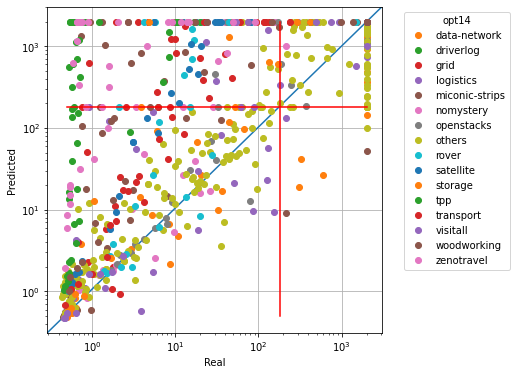

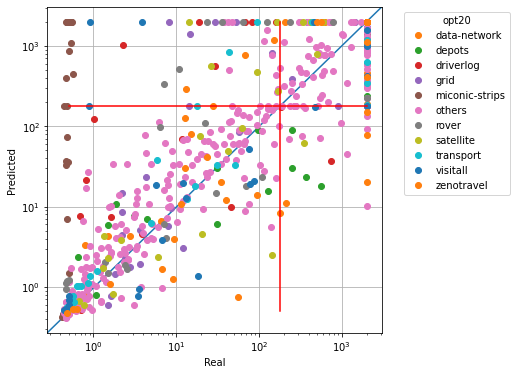

In [9]:
prediction_plot('opt14')
prediction_plot('opt20')


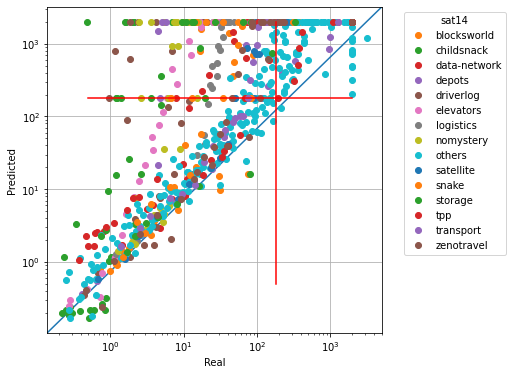

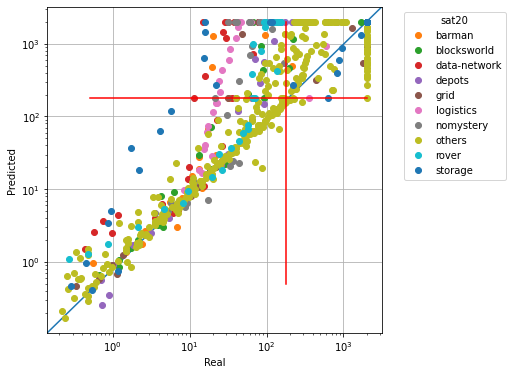

In [77]:
prediction_plot('sat14')
prediction_plot('sat20')

In [23]:
from IPython.display import display
import pandas as pd
import math
import json
from collections import defaultdict
import statistics 

pd.set_option('display.max_rows', 500)

def show_table(track):
    with open(real_filenames[track]) as f1:
        real_data = json.load(f1) 

    real = []
    runtimes_per_domain = defaultdict(list)
    
    for instance in sorted(real_data): 
        domain = instance.split(":")[0]
    
        if real_data[instance]:
            runtimes_per_domain[domain].append(real_data[instance])    

    table = []
    for domain in runtimes_per_domain:
        runtimes = sorted(runtimes_per_domain[domain])
        factors = [r/runtimes[i] for i, r in enumerate (runtimes[1:])]
        runtimes_g10 = [r for r in runtimes if r > 10]
        factors_g10 = [r/runtimes_g10[i] for i, r in enumerate (runtimes_g10[1:])]
    
        if factors_g10:
            table.append ([domain, min(runtimes), max(runtimes), min(factors), max(factors), statistics.geometric_mean(factors), min(factors_g10), max(factors_g10), statistics.geometric_mean(factors_g10), runtimes_g10])    
        else: 
            table.append ([domain, min(runtimes), max(runtimes), min(factors), max(factors), statistics.geometric_mean(factors), "-", "-","-","-"])    
    df = pd.DataFrame(table,columns = [track, "min runtime", "max runtime", "min factor", "max factor", "gavg factor",  "min factor g10", "max factor g10", "gavg factor g10", "factors g10"])

    pd.options.display.float_format = "{:,.2f}".format

    df = df.set_index(track)


    display(df)
show_table("opt20")
show_table("sat20")
show_table("optipc")
show_table("satipc")



,min runtime,max runtime,min factor,max factor,gavg factor,min factor g10,max factor g10,gavg factor g10,factors g10
opt20,,,,,,,,,
barman,0.51,584.89,1.06,5.85,1.72,1.73,5.85,2.48,"[15.42, 29.43, 57.8, 338.4, 584.89]"
blocksworld,0.47,454.52,1.00,15.21,1.77,1.06,2.59,1.76,"[47.45, 113.94, 165.95, 430.01, 454.52]"
childsnack,0.45,672.64,1.02,3.20,1.44,1.27,3.20,1.83,"[17.75, 56.85, 103.78, 160.17, 238.96, 530.12,..."
data-network,0.58,625.79,1.00,4.36,1.59,1.05,2.91,1.63,"[12.74, 15.24, 35.04, 40.29, 55.25, 95.44, 203..."
depots,0.55,555.56,1.00,6.93,1.59,1.00,3.08,1.43,"[31.18, 31.53, 97.02, 126.98, 250.39, 251.31, ..."
driverlog,0.49,752.16,1.00,4.08,1.44,1.14,4.08,1.68,"[11.8, 18.99, 29.6, 45.96, 67.82, 83.25, 162.2..."
elevators,0.73,453.40,1.00,2.87,1.43,1.09,2.68,1.55,"[20.92, 24.03, 37.71, 64.46, 172.95, 308.47, 3..."
floortile,0.44,"1,015.12",1.00,2.84,1.50,1.00,2.84,1.61,"[13.82, 15.63, 21.86, 43.17, 43.31, 65.16, 141..."
grid,0.64,"1,456.43",1.00,2.47,1.35,1.04,2.47,1.55,"[12.15, 14.15, 14.68, 29.43, 52.33, 57.65, 142..."


,min runtime,max runtime,min factor,max factor,gavg factor,min factor g10,max factor g10,gavg factor g10,factors g10
sat20,,,,,,,,,
barman,0.55,217.28,1.02,2.69,1.23,1.02,1.52,1.16,"[10.64, 13.14, 13.36, 14.46, 17.14, 19.51, 20...."
blocksworld,0.66,"1,687.14",1.02,2.79,1.34,1.02,2.79,1.33,"[13.32, 18.45, 18.9, 28.45, 56.23, 57.11, 67.1..."
childsnack,0.25,780.09,1.01,2.41,1.50,1.01,2.41,1.53,"[10.91, 16.43, 39.61, 70.9, 88.1, 88.59, 96.21..."
data-network,0.44,382.29,1.00,3.23,1.26,1.00,3.23,1.23,"[11.41, 14.75, 15.58, 16.05, 22.65, 26.07, 27...."
depots,0.71,"1,006.63",1.00,2.35,1.28,1.00,2.35,1.24,"[10.64, 18.52, 25.52, 31.68, 43.02, 63.87, 70...."
driverlog,0.35,716.49,1.07,4.36,1.53,1.07,2.18,1.43,"[14.26, 20.88, 45.47, 60.09, 87.27, 143.36, 17..."
elevators,0.23,1.34,1.00,1.35,1.06,-,-,-,-
floortile,0.22,128.54,1.03,2.10,1.49,1.03,1.86,1.43,"[10.66, 13.74, 18.78, 27.85, 51.89, 53.39, 95...."
grid,0.33,"1,805.55",1.05,2.88,1.51,1.05,2.88,1.54,"[10.31, 12.82, 17.64, 21.8, 26.54, 31.88, 48.2..."


,min runtime,max runtime,min factor,max factor,gavg factor,min factor g10,max factor g10,gavg factor g10,factors g10
optipc,,,,,,,,,
agricola-opt18-strips,24.58,"1,239.05",1.04,1.87,1.39,1.04,1.87,1.39,"[24.58, 38.6, 42.65, 78.14, 90.24, 110.23, 155..."
airport,0.55,"1,741.96",1.01,3.89,1.24,1.01,3.89,1.38,"[27.59, 47.01, 98.47, 101.27, 116.96, 454.81, ..."
barman-opt11-strips,7.38,949.13,1.01,10.98,1.72,1.03,10.98,1.71,"[64.37, 71.6, 73.63, 76.22, 837.24, 949.13]"
barman-opt14-strips,20.44,310.10,1.13,5.32,1.72,1.13,5.32,1.72,"[20.44, 23.18, 33.31, 177.33, 249.2, 310.1]"
blocks,0.45,"1,244.75",1.00,6.92,1.29,1.05,6.92,2.36,"[17.07, 27.87, 45.68, 47.9, 331.42, 1244.75]"
caldera-opt18-adl,0.68,"1,514.60",1.01,4.38,1.67,1.31,4.38,2.12,"[16.77, 21.89, 33.38, 146.18, 343.47, 466.38, ..."
caldera-split-opt18-adl,1.93,74.77,1.00,2.38,1.39,1.22,2.38,1.64,"[10.31, 20.93, 49.79, 61.08, 74.77]"
cavediving-14-adl,2.65,8.31,1.07,1.85,1.21,-,-,-,-
childsnack-opt14-strips,2.03,"1,403.45",1.02,13.57,2.54,1.02,13.57,2.66,"[74.41, 101.77, 1381.29, 1403.45]"


,min runtime,max runtime,min factor,max factor,gavg factor,min factor g10,max factor g10,gavg factor g10,factors g10
satipc,,,,,,,,,
agricola-sat18-strips,16.69,"1,147.48",1.03,2.09,1.38,1.03,2.09,1.38,"[16.69, 24.57, 27.43, 53.69, 70.4, 72.63, 82.7..."
airport,0.18,"2,009.63",1.00,9.17,1.22,1.00,9.17,1.32,"[14.09, 16.22, 18.3, 19.69, 23.69, 23.81, 24.8..."
assembly,0.25,2.39,1.00,1.80,1.08,-,-,-,-
barman-sat11-strips,1.28,4.83,1.00,1.22,1.07,-,-,-,-
barman-sat14-strips,1.60,6.39,1.00,1.27,1.08,-,-,-,-
blocks,0.18,0.76,1.00,1.26,1.04,-,-,-,-
caldera-sat18-adl,0.93,491.71,1.03,3.82,1.57,1.11,2.16,1.48,"[21.01, 26.86, 29.85, 58.23, 88.16, 190.83, 23..."
caldera-split-sat18-adl,0.49,"1,268.93",1.00,5.54,2.19,1.82,5.54,3.15,"[12.86, 47.78, 126.24, 699.08, 1268.93]"
cavediving-14-adl,0.32,25.31,1.02,26.93,1.87,-,-,-,-
